In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from rdkit import Chem
from rdkit.Chem import AllChem, Descriptors
import os
os.chdir("..")
os.chdir("Preprocessing")
from preprocessing import *
import selfies as sf

#Ensemble learning and random forest

df = preprocessing("C:\\Users\Gilbert\Documents\BCB_Research\Kcat_Benchmark_ML_Models\Data\kcat_transferase.csv")
encoded_df = pd.read_csv("C:\\Users\Gilbert\Documents\BCB_Research\Kcat_Benchmark_ML_Models\Data\encoded_amino.csv")

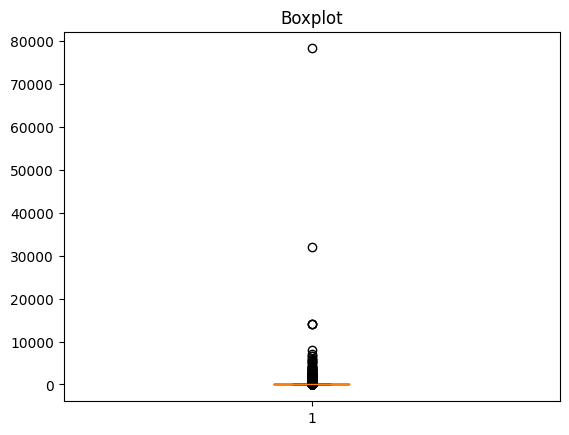

In [12]:
import matplotlib.pyplot as plt

# Boxplot
plt.boxplot(df["Kcat"])
plt.title("Boxplot")
plt.show()

In [13]:
import numpy as np
from scipy import stats

z_scores = np.abs(stats.zscore(df["Kcat"]))
outliers = np.where(z_scores > 3)

In [17]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.05)  # Adjust contamination parameter based on expected ratio of outliers
predictions = clf.fit_predict(df["Kcat"].values.reshape(-1, 1))
outliers = np.where(predictions == -1)

print(outliers)

(array([ 455,  490,  491,  492,  493,  494,  550,  557,  558,  559,  560,
        561,  562,  563,  568,  569,  662,  738,  747,  748,  749,  750,
        753,  810,  811,  915,  918,  920,  921,  923,  925,  926,  927,
        928,  929,  930,  931,  933,  934,  935,  936,  937,  943,  944,
        945,  946,  947,  948,  949,  950,  951, 1009, 1109, 1112, 1113,
       1160, 1181, 1187, 1210, 1212, 1213, 1214, 1215, 1216, 1217, 1837,
       1845, 1894, 1895, 1896, 1911, 1914, 1918, 2124, 2125, 2126, 2127,
       2128, 2129, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138,
       2139, 2140, 2141, 2142, 2143, 2248, 2252, 2304, 2305, 2306, 2314,
       2428, 2429, 2430, 2431, 2469, 2470, 2471, 2472, 2481, 2483, 2485,
       2531, 2532, 2533, 2574, 2576, 2577, 2580, 2581, 2748, 2877, 2989,
       2991, 2992, 3163, 3174, 3184, 3249, 3251, 3252, 3253, 3254, 3255,
       3256, 3257, 3258, 3259, 3260, 3261, 3262, 3263, 3264, 3265, 3266,
       3267, 3268, 3269, 3270, 3271, 3272, 3274, 3

In [ ]:
#Amino Acid one hot encoding + PCA 

# # Define the standard amino acids plus the padding character 'X'
# amino_acids = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', 'X']

# # Find the length of the longest sequence
# max_length = data['Amino_encoding'].str.len().max()

# # Function to pad the sequences
# def pad_sequence(seq, max_length):
#     return seq.ljust(max_length, 'X')

# # Apply padding to sequences
# data['padded_sequence'] = data['Amino_encoding'].apply(lambda x: pad_sequence(x, max_length))

# # One-hot encode the padded sequences
# def one_hot_encode(seq):
#     return [[1 if amino == aa else 0 for amino in amino_acids] for aa in seq]

# encoded_sequences = data['padded_sequence'].apply(one_hot_encode)

# # Convert the encoded sequences to a list of lists
# encoded_list = encoded_sequences.apply(lambda x: [item for sublist in x for item in sublist]).tolist()

# # Create a DataFrame from the flattened one-hot encoded list
# encoded_df = pd.DataFrame(encoded_list)

# # Rename columns for clarity
# encoded_df.columns = [f'Pos_{i+1}_{aa}' for i in range(max_length) for aa in amino_acids]

# Assuming encoded_df is your one-hot encoded data from before
amino_pca = PCA(n_components=433) # to find 433 was to run PCA to find the optimal number of Amino acids
principal_components = amino_pca.fit_transform(encoded_df)

# Convert to DataFrame for convenience
amino_pca_df = pd.DataFrame(data=principal_components)

In [ ]:
#EC conversion into PCA

Ec_data = pd.get_dummies(data["EC_number"], prefix=["EC"])
Ec_df = pd.DataFrame(Ec_data).astype(int)
ec_pca = PCA(n_components=280)
ec_principal_components = ec_pca.fit_transform(Ec_df)

# Convert to DataFrame for convenience
Ec_df = pd.DataFrame(data=ec_principal_components)